# Prediction Of RainToday

**Overview**

The primary objective of this to develop a machine learning model capable of predicting the day is rainy .

The dataset used for this project is from kaggle.The dataset include Date,Temp,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir,Humidity,Cloud.

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load Dataset

df=pd.read_csv('/content/drive/MyDrive/Weather_Data.csv')
df

Date  Temp9am  Temp3pm  MinTemp  MaxTemp  Rainfall RainToday  \
0     01-02-13     20.7     20.9     19.5     22.4      15.6       Yes   
1     02-02-13     22.4     24.8     19.5     25.6       6.0       Yes   
2     03-02-13     23.5     23.0     21.6     24.5       6.6       Yes   
3     04-02-13     21.4     20.9     20.2     22.8      18.8       Yes   
4     05-02-13     22.5     25.5     19.7     25.7      77.4       Yes   
...        ...      ...      ...      ...      ...       ...       ...   
3266  11-01-22     10.5     17.9      8.6     19.6       0.0        No   
3267  12-01-22     11.0     18.7      9.3     19.2       0.0        No   
3268  13-01-22     10.2     17.3      9.4     17.7       0.0        No   
3269  14-01-22     12.4     19.0     10.1     19.3       0.0        No   
3270  15-01-22      9.4     18.8      7.6     19.3       0.0        No   

      Evaporation  Sunshine WindGustDir  ...  WindDir9am WindDir3pm  \
0             6.2       0.0           W  ...           S        SSW   
1             3.4       2.7           W  ...           W          E   
2             2.4       0.1           W  ...         ESE        ESE   
3             2.2       0.0           W  ...         NNE          E   
4             4.8       0.0           W  ...         NNE          W   
...           ...       ...         ...  ...         ...        ...   
3266          2.0       7.8         SSE  ...           W        SSE   
3267          2.0       9.2           W  ...           W        ESE   
3268          2.4       2.7           W  ...         WNW          N   
3269          1.4       9.3           W  ...           W          W   
3270          3.4       9.4           W  ...           W          W   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0              17            20           92           84       1017.6   
1               9            13           83           73       1017.9   
2              17             2           88           86       1016.7   
3              22            20           83           90       1014.2   
4              11             6           88           74       1008.3   
...           ...           ...          ...          ...          ...   
3266           22            20           73           52       1025.9   
3267           20             7           78           53       1028.5   
3268           15            13           85           56       1020.8   
3269           17            19           56           35       1017.3   
3270           13            13           73           32       1018.6   

      Pressure3pm  Cloud9am  Cloud3pm  
0          1017.4         8         8  
1          1016.4         7         7  
2          1015.6         7         8  
3          1011.8         8         8  
4          1004.8         8         8  
...           ...       ...       ...  
3266       1025.3         2         2  
3267       1024.6         2         2  
3268       1015.0         6         6  
3269       1015.1         5         2  
3270       1015.4         1         1  

[3271 rows x 21 columns]

**Data preprocessing**

In [ ]:
#to check the missing value
df.isna().sum()

Date             0
Temp9am          0
Temp3pm          0
MinTemp          0
MaxTemp          0
Rainfall         0
RainToday        0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
dtype: int64

In [ ]:
#to check the type of each columns
df.dtypes

Date              object
Temp9am          float64
Temp3pm          float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
RainToday         object
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed      int64
WindDir9am        object
WindDir3pm        object
WindSpeed9am       int64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
dtype: object

In [ ]:
df.columns

Index(['Date', 'Temp9am', 'Temp3pm', 'MinTemp', 'MaxTemp', 'Rainfall',
       'RainToday', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm'],
      dtype='object')

In [ ]:
#to get the summary of that data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   Temp9am        3271 non-null   float64
 2   Temp3pm        3271 non-null   float64
 3   MinTemp        3271 non-null   float64
 4   MaxTemp        3271 non-null   float64
 5   Rainfall       3271 non-null   float64
 6   RainToday      3271 non-null   object 
 7   Evaporation    3271 non-null   float64
 8   Sunshine       3271 non-null   float64
 9   WindGustDir    3271 non-null   object 
 10  WindGustSpeed  3271 non-null   int64  
 11  WindDir9am     3271 non-null   object 
 12  WindDir3pm     3271 non-null   object 
 13  WindSpeed9am   3271 non-null   int64  
 14  WindSpeed3pm   3271 non-null   int64  
 15  Humidity9am    3271 non-null   int64  
 16  Humidity3pm    3271 non-null   int64  
 17  Pressure9am    3271 non-null   float64
 18  Pressure

In [ ]:
#calculate the correlation for feature selection
df.corr()

Temp9am   Temp3pm   MinTemp   MaxTemp  Rainfall  Evaporation  \
Temp9am        1.000000  0.828457  0.939307  0.858639 -0.054297     0.606122   
Temp3pm        0.828457  1.000000  0.753147  0.960805 -0.142748     0.474599   
MinTemp        0.939307  0.753147  1.000000  0.771005  0.013995     0.569316   
MaxTemp        0.858639  0.960805  0.771005  1.000000 -0.139306     0.510334   
Rainfall      -0.054297 -0.142748  0.013995 -0.139306  1.000000    -0.110343   
Evaporation    0.606122  0.474599  0.569316  0.510334 -0.110343     1.000000   
Sunshine       0.113891  0.345528 -0.063475  0.327422 -0.308962     0.175932   
WindGustSpeed  0.159570  0.036216  0.127792  0.073184  0.149811     0.245426   
WindSpeed9am  -0.334084 -0.351836 -0.298040 -0.349382  0.153696    -0.077532   
WindSpeed3pm   0.280009  0.136713  0.225905  0.155542  0.039415     0.292469   
Humidity9am   -0.145944 -0.155192  0.053946 -0.185382  0.332636    -0.395651   
Humidity3pm    0.131855 -0.212696  0.273269 -0.150741  0.305635    -0.102295   
Pressure9am   -0.417437 -0.342862 -0.391654 -0.385853 -0.037561    -0.343581   
Pressure3pm   -0.401353 -0.387945 -0.353334 -0.420375  0.001780    -0.298303   
Cloud9am       0.093204 -0.086544  0.241248 -0.084695  0.245231    -0.037051   
Cloud3pm       0.068683 -0.144965  0.164028 -0.099217  0.200999    -0.038422   

               Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
Temp9am        0.113891       0.159570     -0.334084      0.280009   
Temp3pm        0.345528       0.036216     -0.351836      0.136713   
MinTemp       -0.063475       0.127792     -0.298040      0.225905   
MaxTemp        0.327422       0.073184     -0.349382      0.155542   
Rainfall      -0.308962       0.149811      0.153696      0.039415   
Evaporation    0.175932       0.245426     -0.077532      0.292469   
Sunshine       1.000000      -0.029032     -0.058410      0.177813   
WindGustSpeed -0.029032       1.000000      0.256460      0.509825   
WindSpeed9am  -0.058410       0.256460      1.000000      0.197669   
WindSpeed3pm   0.177813       0.509825      0.197669      1.000000   
Humidity9am   -0.490631      -0.225613     -0.189763     -0.288910   
Humidity3pm   -0.586476      -0.095037     -0.148849     -0.135039   
Pressure9am   -0.047789      -0.408876      0.003737     -0.333810   
Pressure3pm   -0.094507      -0.351850      0.091878     -0.277749   
Cloud9am      -0.665014       0.024275     -0.062441     -0.050932   
Cloud3pm      -0.677861       0.044016     -0.018030     -0.095435   

               Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Temp9am          -0.145944     0.131855    -0.417437    -0.401353  0.093204   
Temp3pm          -0.155192    -0.212696    -0.342862    -0.387945 -0.086544   
MinTemp           0.053946     0.273269    -0.391654    -0.353334  0.241248   
MaxTemp          -0.185382    -0.150741    -0.385853    -0.420375 -0.084695   
Rainfall          0.332636     0.305635    -0.037561     0.001780  0.245231   
Evaporation      -0.395651    -0.102295    -0.343581    -0.298303 -0.037051   
Sunshine         -0.490631    -0.586476    -0.047789    -0.094507 -0.665014   
WindGustSpeed    -0.225613    -0.095037    -0.408876    -0.351850  0.024275   
WindSpeed9am     -0.189763    -0.148849     0.003737     0.091878 -0.062441   
WindSpeed3pm     -0.288910    -0.135039    -0.333810    -0.277749 -0.050932   
Humidity9am       1.000000     0.657933     0.262098     0.249202  0.431550   
Humidity3pm       0.657933     1.000000     0.151608     0.179611  0.463529   
Pressure9am       0.262098     0.151608     1.000000     0.963307 -0.015889   
Pressure3pm       0.249202     0.179611     0.963307     1.000000  0.013787   
Cloud9am          0.431550     0.463529    -0.015889     0.013787  1.000000   
Cloud3pm          0.331062     0.472248    -0.039509    -0.003536  0.604359   

               Cloud3pm  
Temp9am        0.068683  
Temp3pm       -0.144965  
MinTemp        0.164028  
MaxTemp       -0

In [ ]:
df['WindDir9am'].value_counts()


W      1260
WNW     485
SSW     185
S       156
E       141
ESE     134
SSE     121
NNW     103
N       100
SE      100
WSW      97
NNE      89
NW       85
NE       80
ENE      79
SW       56
Name: WindDir9am, dtype: int64

In [ ]:
df['WindGustDir'].value_counts()

W      1425
SSE     239
ENE     214
NE      169
S       169
SSW     163
NNE     149
ESE     140
WSW     134
E       122
WNW      79
NW       68
SE       68
NNW      52
SW       50
N        30
Name: WindGustDir, dtype: int64

In [ ]:
#Replace the object value into neumeric value

df['RainToday']=df['RainToday'].map({'Yes':1,'No':0})
df['WindGustDir']=df['WindGustDir'].map({'W':0,'SSE':1,'ENE':2,'NE':3,'S':4,'SSW':5,'NNE':6,'ESE':7,'WSW':8,'E':9,'WNW':10,'NW':11,'SE':12,'NNW':13,'SW':14,'N':15})
df['WindDir9am']=df['WindDir9am'].map({'W':0,'SSE':1,'ENE':2,'NE':3,'S':4,'SSW':5,'NNE':6,'ESE':7,'WSW':8,'E':9,'WNW':10,'NW':11,'SE':12,'NNW':13,'SW':14,'N':15})
df['WindDir3pm']=df['WindDir3pm'].map({'W':0,'SSE':1,'ENE':2,'NE':3,'S':4,'SSW':5,'NNE':6,'ESE':7,'WSW':8,'E':9,'WNW':10,'NW':11,'SE':12,'NNW':13,'SW':14,'N':15})
df

Date  Temp9am  Temp3pm  MinTemp  MaxTemp  Rainfall  RainToday  \
0     01-02-13     20.7     20.9     19.5     22.4      15.6          1   
1     02-02-13     22.4     24.8     19.5     25.6       6.0          1   
2     03-02-13     23.5     23.0     21.6     24.5       6.6          1   
3     04-02-13     21.4     20.9     20.2     22.8      18.8          1   
4     05-02-13     22.5     25.5     19.7     25.7      77.4          1   
...        ...      ...      ...      ...      ...       ...        ...   
3266  11-01-22     10.5     17.9      8.6     19.6       0.0          0   
3267  12-01-22     11.0     18.7      9.3     19.2       0.0          0   
3268  13-01-22     10.2     17.3      9.4     17.7       0.0          0   
3269  14-01-22     12.4     19.0     10.1     19.3       0.0          0   
3270  15-01-22      9.4     18.8      7.6     19.3       0.0          0   

      Evaporation  Sunshine  WindGustDir  ...  WindDir9am  WindDir3pm  \
0             6.2       0.0            0  ...           4           5   
1             3.4       2.7            0  ...           0           9   
2             2.4       0.1            0  ...           7           7   
3             2.2       0.0            0  ...           6           9   
4             4.8       0.0            0  ...           6           0   
...           ...       ...          ...  ...         ...         ...   
3266          2.0       7.8            1  ...           0           1   
3267          2.0       9.2            0  ...           0           7   
3268          2.4       2.7            0  ...          10          15   
3269          1.4       9.3            0  ...           0           0   
3270          3.4       9.4            0  ...           0           0   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               17            20           92           84       1017.6   
1                9            13           83           73       1017.9   
2               17             2           88           86       1016.7   
3               22            20           83           90       1014.2   
4               11             6           88           74       1008.3   
...            ...           ...          ...          ...          ...   
3266            22            20           73           52       1025.9   
3267            20             7           78           53       1028.5   
3268            15            13           85           56       1020.8   
3269            17            19           56           35       1017.3   
3270            13            13           73           32       1018.6   

      Pressure3pm  Cloud9am  Cloud3pm  
0          1017.4         8         8  
1          1016.4         7         7  
2          1015.6         7         8  
3          1011.8         8         8  
4          1004.8         8         8  
...           ...       ...       ...  
3266       1025.3         2         2  
3267       1024.6         2         2  
3268       1015.0         6         6  
3269       1015.1         5         2  
3270       1015.4         1         1  

[3271 rows x 21 columns]

In [ ]:
df['Temp3pm']=df['Temp3pm'].astype(int)
df['MinTemp']=df['MinTemp'].astype(int)
df['MaxTemp']=df['MaxTemp'].astype(int)
df['Rainfall']=df['Rainfall'].astype(int)
df['Evaporation']=df['Evaporation'].astype(int)
df['Sunshine']=df['Sunshine'].astype(int)
df['Pressure9am']=df['Pressure9am'].astype(int)

In [ ]:
df.drop(['Date','Temp9am','WindGustDir','Pressure3pm'],axis=1,inplace=True)
df

Temp3pm  MinTemp  MaxTemp  Rainfall  RainToday  Evaporation  Sunshine  \
0          20       19       22        15          1            6         0   
1          24       19       25         6          1            3         2   
2          23       21       24         6          1            2         0   
3          20       20       22        18          1            2         0   
4          25       19       25        77          1            4         0   
...       ...      ...      ...       ...        ...          ...       ...   
3266       17        8       19         0          0            2         7   
3267       18        9       19         0          0            2         9   
3268       17        9       17         0          0            2         2   
3269       19       10       19         0          0            1         9   
3270       18        7       19         0          0            3         9   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0                41           4           5            17            20   
1                41           0           9             9            13   
2                41           7           7            17             2   
3                41           6           9            22            20   
4                41           6           0            11             6   
...             ...         ...         ...           ...           ...   
3266             37           0           1            22            20   
3267             30           0           7            20             7   
3268             24          10          15            15            13   
3269             43           0           0            17            19   
3270             35           0           0            13            13   

      Humidity9am  Humidity3pm  Pressure9am  Cloud9am  Cloud3pm  
0              92           84         1017         8         8  
1              83           73         1017         7         7  
2              88           86         1016         7         8  
3              83           90         1014         8         8  
4              88           74         1008         8         8  
...           ...          ...          ...       ...       ...  
3266           73           52         1025         2         2  
3267           78           53         1028         2         2  
3268           85           56         1020         6         6  
3269           56           35         1017         5         2  
3270           73           32         1018         1         1  

[3271 rows x 17 columns]

In [ ]:
#splitting the data into input and output variables
X=df.drop(['RainToday'],axis=1)
X

Temp3pm  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0          20       19       22        15            6         0   
1          24       19       25         6            3         2   
2          23       21       24         6            2         0   
3          20       20       22        18            2         0   
4          25       19       25        77            4         0   
...       ...      ...      ...       ...          ...       ...   
3266       17        8       19         0            2         7   
3267       18        9       19         0            2         9   
3268       17        9       17         0            2         2   
3269       19       10       19         0            1         9   
3270       18        7       19         0            3         9   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0                41           4           5            17            20   
1                41           0           9             9            13   
2                41           7           7            17             2   
3                41           6           9            22            20   
4                41           6           0            11             6   
...             ...         ...         ...           ...           ...   
3266             37           0           1            22            20   
3267             30           0           7            20             7   
3268             24          10          15            15            13   
3269             43           0           0            17            19   
3270             35           0           0            13            13   

      Humidity9am  Humidity3pm  Pressure9am  Cloud9am  Cloud3pm  
0              92           84         1017         8         8  
1              83           73         1017         7         7  
2              88           86         1016         7         8  
3              83           90         1014         8         8  
4              88           74         1008         8         8  
...           ...          ...          ...       ...       ...  
3266           73           52         1025         2         2  
3267           78           53         1028         2         2  
3268           85           56         1020         6         6  
3269           56           35         1017         5         2  
3270           73           32         1018         1         1  

[3271 rows x 16 columns]

In [ ]:
Y=df['RainToday']
Y

0       1
1       1
2       1
3       1
4       1
       ..
3266    0
3267    0
3268    0
3269    0
3270    0
Name: RainToday, Length: 3271, dtype: int64

In [ ]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.29411765, 0.65217391, 0.32352941, ..., 0.58490566, 0.88888889,
        1.        ],
       [0.41176471, 0.65217391, 0.41176471, ..., 0.58490566, 0.77777778,
        0.875     ],
       [0.38235294, 0.73913043, 0.38235294, ..., 0.56603774, 0.77777778,
        1.        ],
       ...,
       [0.20588235, 0.2173913 , 0.17647059, ..., 0.64150943, 0.66666667,
        0.75      ],
       [0.26470588, 0.26086957, 0.23529412, ..., 0.58490566, 0.55555556,
        0.25      ],
       [0.23529412, 0.13043478, 0.23529412, ..., 0.60377358, 0.11111111,
        0.125     ]])

In [ ]:
#spliting the values into  train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=1)

**Model Creation**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

**MODEL 1 KNeighborsClassifier**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)



KNeighborsClassifier(n_neighbors=7)

In [ ]:
Y_knn_pred=knn.predict(X_test)
Y_knn_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

accuracy score: 0.8126272912423625
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       724
           1       0.71      0.48      0.58       258

    accuracy                           0.81       982
   macro avg       0.77      0.71      0.73       982
weighted avg       0.80      0.81      0.80       982



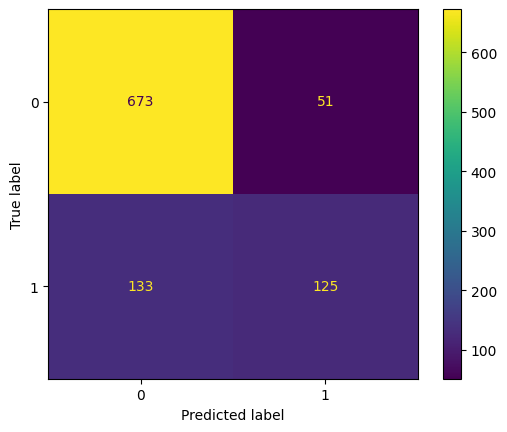

In [ ]:
#performence measure
print('accuracy score:',accuracy_score(Y_test,Y_knn_pred))
print(classification_report(Y_test,Y_knn_pred))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_knn_pred))

**MODEL 2 svm**

In [ ]:
sv=SVC(kernel='linear')
sv.fit(X_train,Y_train)


SVC(kernel='linear')

In [ ]:
Y_sv_pred=sv.predict(X_test)
Y_sv_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,

accuracy score: 0.8340122199592668
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       724
           1       0.75      0.55      0.64       258

    accuracy                           0.83       982
   macro avg       0.80      0.74      0.76       982
weighted avg       0.83      0.83      0.82       982



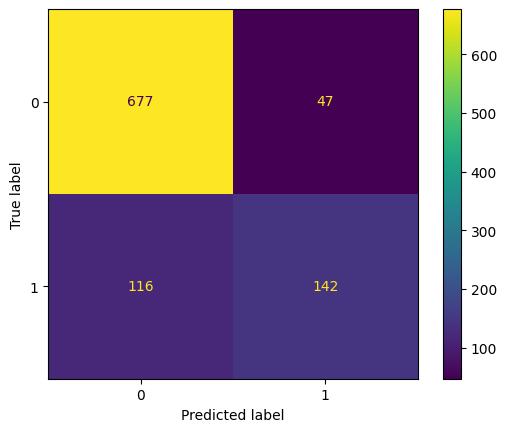

In [ ]:
#performance
print('accuracy score:',accuracy_score(Y_test,Y_sv_pred))
print(classification_report(Y_test,Y_sv_pred))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_sv_pred))

**MODEL 3 naive_bayes**

In [ ]:
nb=GaussianNB()
nb.fit(X_train,Y_train)


GaussianNB()

In [ ]:
Y_nb_pred=nb.predict(X_test)
Y_nb_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,

accuracy score: 0.8095723014256619
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       724
           1       0.62      0.70      0.66       258

    accuracy                           0.81       982
   macro avg       0.76      0.77      0.76       982
weighted avg       0.82      0.81      0.81       982



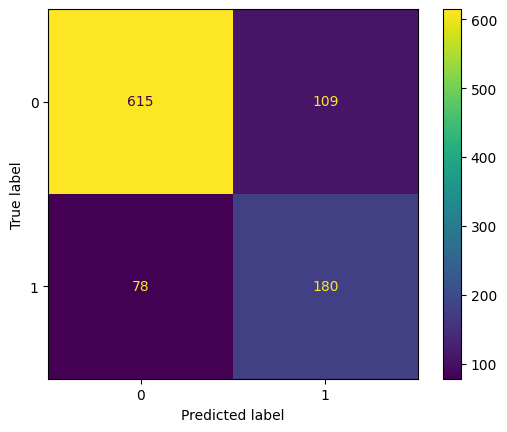

In [ ]:
#performance
print('accuracy score:',accuracy_score(Y_test,Y_nb_pred))
print(classification_report(Y_test,Y_nb_pred))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_nb_pred))

**MODEL 4  DecisionTreeClassifier**

In [ ]:
dec=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dec.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<Figure size 1500x1500 with 0 Axes>

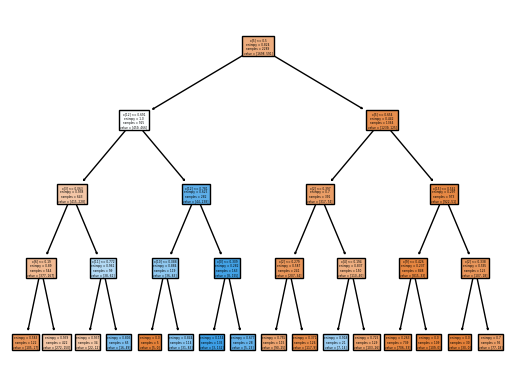

<Figure size 1500x1500 with 0 Axes>

In [ ]:
tree.plot_tree (dec,filled=True)
plt.figure(figsize=(15,15))


In [ ]:
Y_dec_pred=dec.predict(X_test)
Y_dec_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,

accuracy score: 0.8238289205702648
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       724
           1       0.79      0.45      0.57       258

    accuracy                           0.82       982
   macro avg       0.81      0.70      0.73       982
weighted avg       0.82      0.82      0.81       982



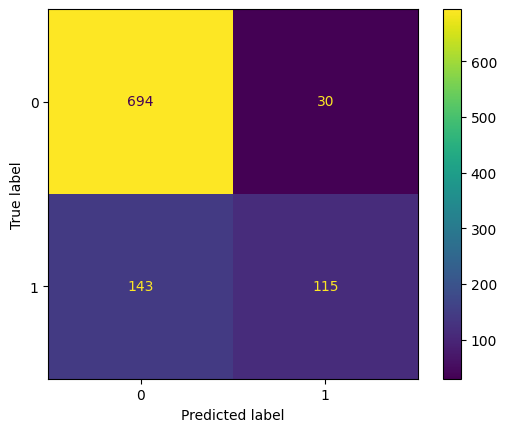

In [ ]:
#performence
print('accuracy score:',accuracy_score(Y_test,Y_dec_pred))
print(classification_report(Y_test,Y_dec_pred))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_dec_pred))

**MODEL 5 RandomForestClassifier**

In [ ]:
rf=RandomForestClassifier(max_depth=10,min_samples_split=5,n_estimators=200,random_state=42)
rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [ ]:
Y_rf_pred=rf.predict(X_test)
Y_rf_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

accuracy score: 0.8421588594704684
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       724
           1       0.80      0.53      0.64       258

    accuracy                           0.84       982
   macro avg       0.83      0.74      0.77       982
weighted avg       0.84      0.84      0.83       982



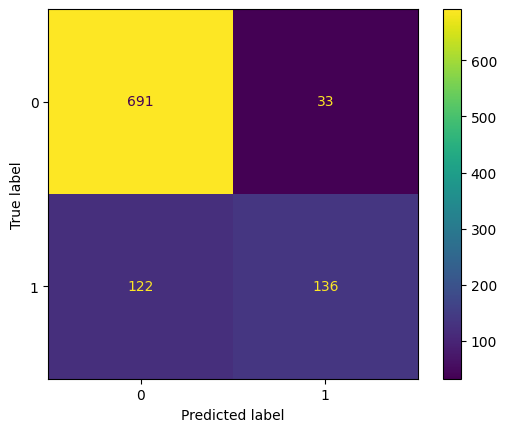

In [ ]:
#performance
print('accuracy score:',accuracy_score(Y_test,Y_rf_pred))
print(classification_report(Y_test,Y_rf_pred))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_rf_pred))

**MODEL 6 AdaboostClassifier**

In [ ]:
ad=AdaBoostClassifier()
ad.fit(X_train,Y_train)

AdaBoostClassifier()

In [ ]:
Y_ad_pred=ad.predict(X_test)
Y_ad_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,

accuracy score: 0.8319755600814664
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       724
           1       0.75      0.53      0.63       258

    accuracy                           0.83       982
   macro avg       0.80      0.74      0.76       982
weighted avg       0.82      0.83      0.82       982



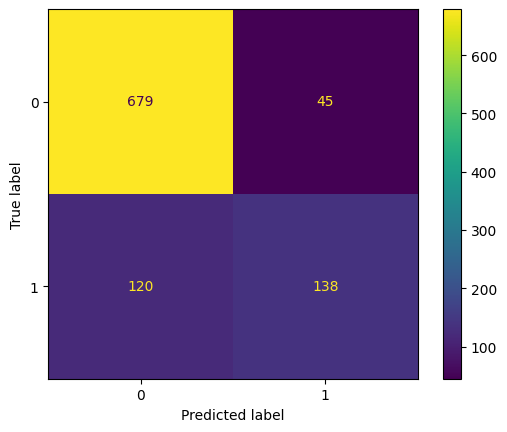

In [ ]:
#performance
print('accuracy score:',accuracy_score(Y_test,Y_ad_pred))
print(classification_report(Y_test,Y_ad_pred))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_ad_pred))


**OVERSAMPLING**

In [ ]:
from imblearn.over_sampling import SMOTE
os=SMOTE()
x_os,y_os=os.fit_resample(X,Y)

In [ ]:
y_os.value_counts()

1    2422
0    2422
Name: RainToday, dtype: int64

In [ ]:
#scaling
X_os_scaled=scaler.fit_transform(X)
X_os_scaled

array([[0.29411765, 0.65217391, 0.32352941, ..., 0.58490566, 0.88888889,
        1.        ],
       [0.41176471, 0.65217391, 0.41176471, ..., 0.58490566, 0.77777778,
        0.875     ],
       [0.38235294, 0.73913043, 0.38235294, ..., 0.56603774, 0.77777778,
        1.        ],
       ...,
       [0.20588235, 0.2173913 , 0.17647059, ..., 0.64150943, 0.66666667,
        0.75      ],
       [0.26470588, 0.26086957, 0.23529412, ..., 0.58490566, 0.55555556,
        0.25      ],
       [0.23529412, 0.13043478, 0.23529412, ..., 0.60377358, 0.11111111,
        0.125     ]])

In [ ]:
X_os_train,X_os_test,Y_os_train,Y_os_test=train_test_split(X_os_scaled,Y,test_size=0.3,random_state=1)

In [ ]:
knn_os=KNeighborsClassifier()
sv_os=SVC()
nb_os=GaussianNB()
dec_os=DecisionTreeClassifier()
rf_os=RandomForestClassifier()
ad_os=AdaBoostClassifier()
models=[knn_os,sv_os,nb_os,dec_os,rf_os,ad_os]
for model in models:
  print('_'*50,model,'_'*50)
  model.fit(X_os_train,Y_os_train)
  Y_os_pred=model.predict(X_os_test)
  print('accuracy score:',accuracy_score(Y_os_test,Y_os_pred))
  print()
  # ynew=model.predict(scaler.transform([[24.8,19.5,25.6,6.0,3.4,2.7,41,0,9,9,13,83,73,1017.9,7,7]]))
  # print(ynew)
  # print()
  print(classification_report(Y_os_test,Y_os_pred))

__________________________________________________ KNeighborsClassifier() __________________________________________________
accuracy score: 0.8075356415478615

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       724
           1       0.68      0.51      0.58       258

    accuracy                           0.81       982
   macro avg       0.76      0.71      0.73       982
weighted avg       0.80      0.81      0.80       982

__________________________________________________ SVC() __________________________________________________
accuracy score: 0.829938900203666

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       724
           1       0.77      0.50      0.61       258

    accuracy                           0.83       982
   macro avg       0.81      0.73      0.75       982
weighted avg       0.82      0.83      0.82       982

__________________________________________

**UNDER SAMPLING**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler()
x_us,y_us=os.fit_resample(X,Y)

In [ ]:
y_us.value_counts()

1    2422
0    2422
Name: RainToday, dtype: int64

In [ ]:
#scaling
X_us_scaled=scaler.fit_transform(X)
X_us_scaled

array([[0.29411765, 0.65217391, 0.32352941, ..., 0.58490566, 0.88888889,
        1.        ],
       [0.41176471, 0.65217391, 0.41176471, ..., 0.58490566, 0.77777778,
        0.875     ],
       [0.38235294, 0.73913043, 0.38235294, ..., 0.56603774, 0.77777778,
        1.        ],
       ...,
       [0.20588235, 0.2173913 , 0.17647059, ..., 0.64150943, 0.66666667,
        0.75      ],
       [0.26470588, 0.26086957, 0.23529412, ..., 0.58490566, 0.55555556,
        0.25      ],
       [0.23529412, 0.13043478, 0.23529412, ..., 0.60377358, 0.11111111,
        0.125     ]])

In [ ]:
X_us_train,X_us_test,Y_us_train,Y_us_test=train_test_split(X_us_scaled,Y,test_size=0.3,random_state=1)

In [ ]:
knn_us=KNeighborsClassifier()
sv_us=SVC()
nb_us=GaussianNB()
dec_us=DecisionTreeClassifier()
rf_us=RandomForestClassifier()
ad_us=AdaBoostClassifier()
models=[knn_us,sv_us,nb_us,dec_us,rf_us,ad_us]
for model in models:
  print('_'*50,model,'_'*50)
  model.fit(X_us_train,Y_us_train)
  Y_us_pred=model.predict(X_us_test)
  print('accuracy score:',accuracy_score(Y_us_test,Y_us_pred))
  print()
  # yNew=model.predict(scaler.transform([[24.8,19.5,25.6,6.0,3.4,2.7,41,0,9,9,13,83,73,1017.9,7,7]]))
  # print(yNew)
  print(classification_report(Y_us_test,Y_us_pred))

__________________________________________________ KNeighborsClassifier() __________________________________________________
accuracy score: 0.8075356415478615

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       724
           1       0.68      0.51      0.58       258

    accuracy                           0.81       982
   macro avg       0.76      0.71      0.73       982
weighted avg       0.80      0.81      0.80       982

__________________________________________________ SVC() __________________________________________________
accuracy score: 0.829938900203666

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       724
           1       0.77      0.50      0.61       258

    accuracy                           0.83       982
   macro avg       0.81      0.73      0.75       982
weighted avg       0.82      0.83      0.82       982

__________________________________________

In [ ]:
#new value prediction using random forest
rf_new_pred=rf.predict(scaler.transform([[24.8,19.5,25.6,6.0,3.4,2.7,41,0,9,9,13,83,73,1017.9,7,7]]))
rf_new_pred

array([1])

**Datavisualization**

<Axes: >

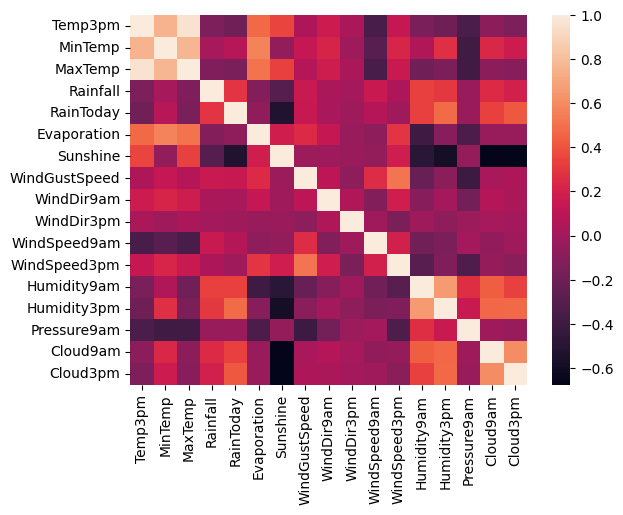

In [ ]:
sns.heatmap(df.corr())

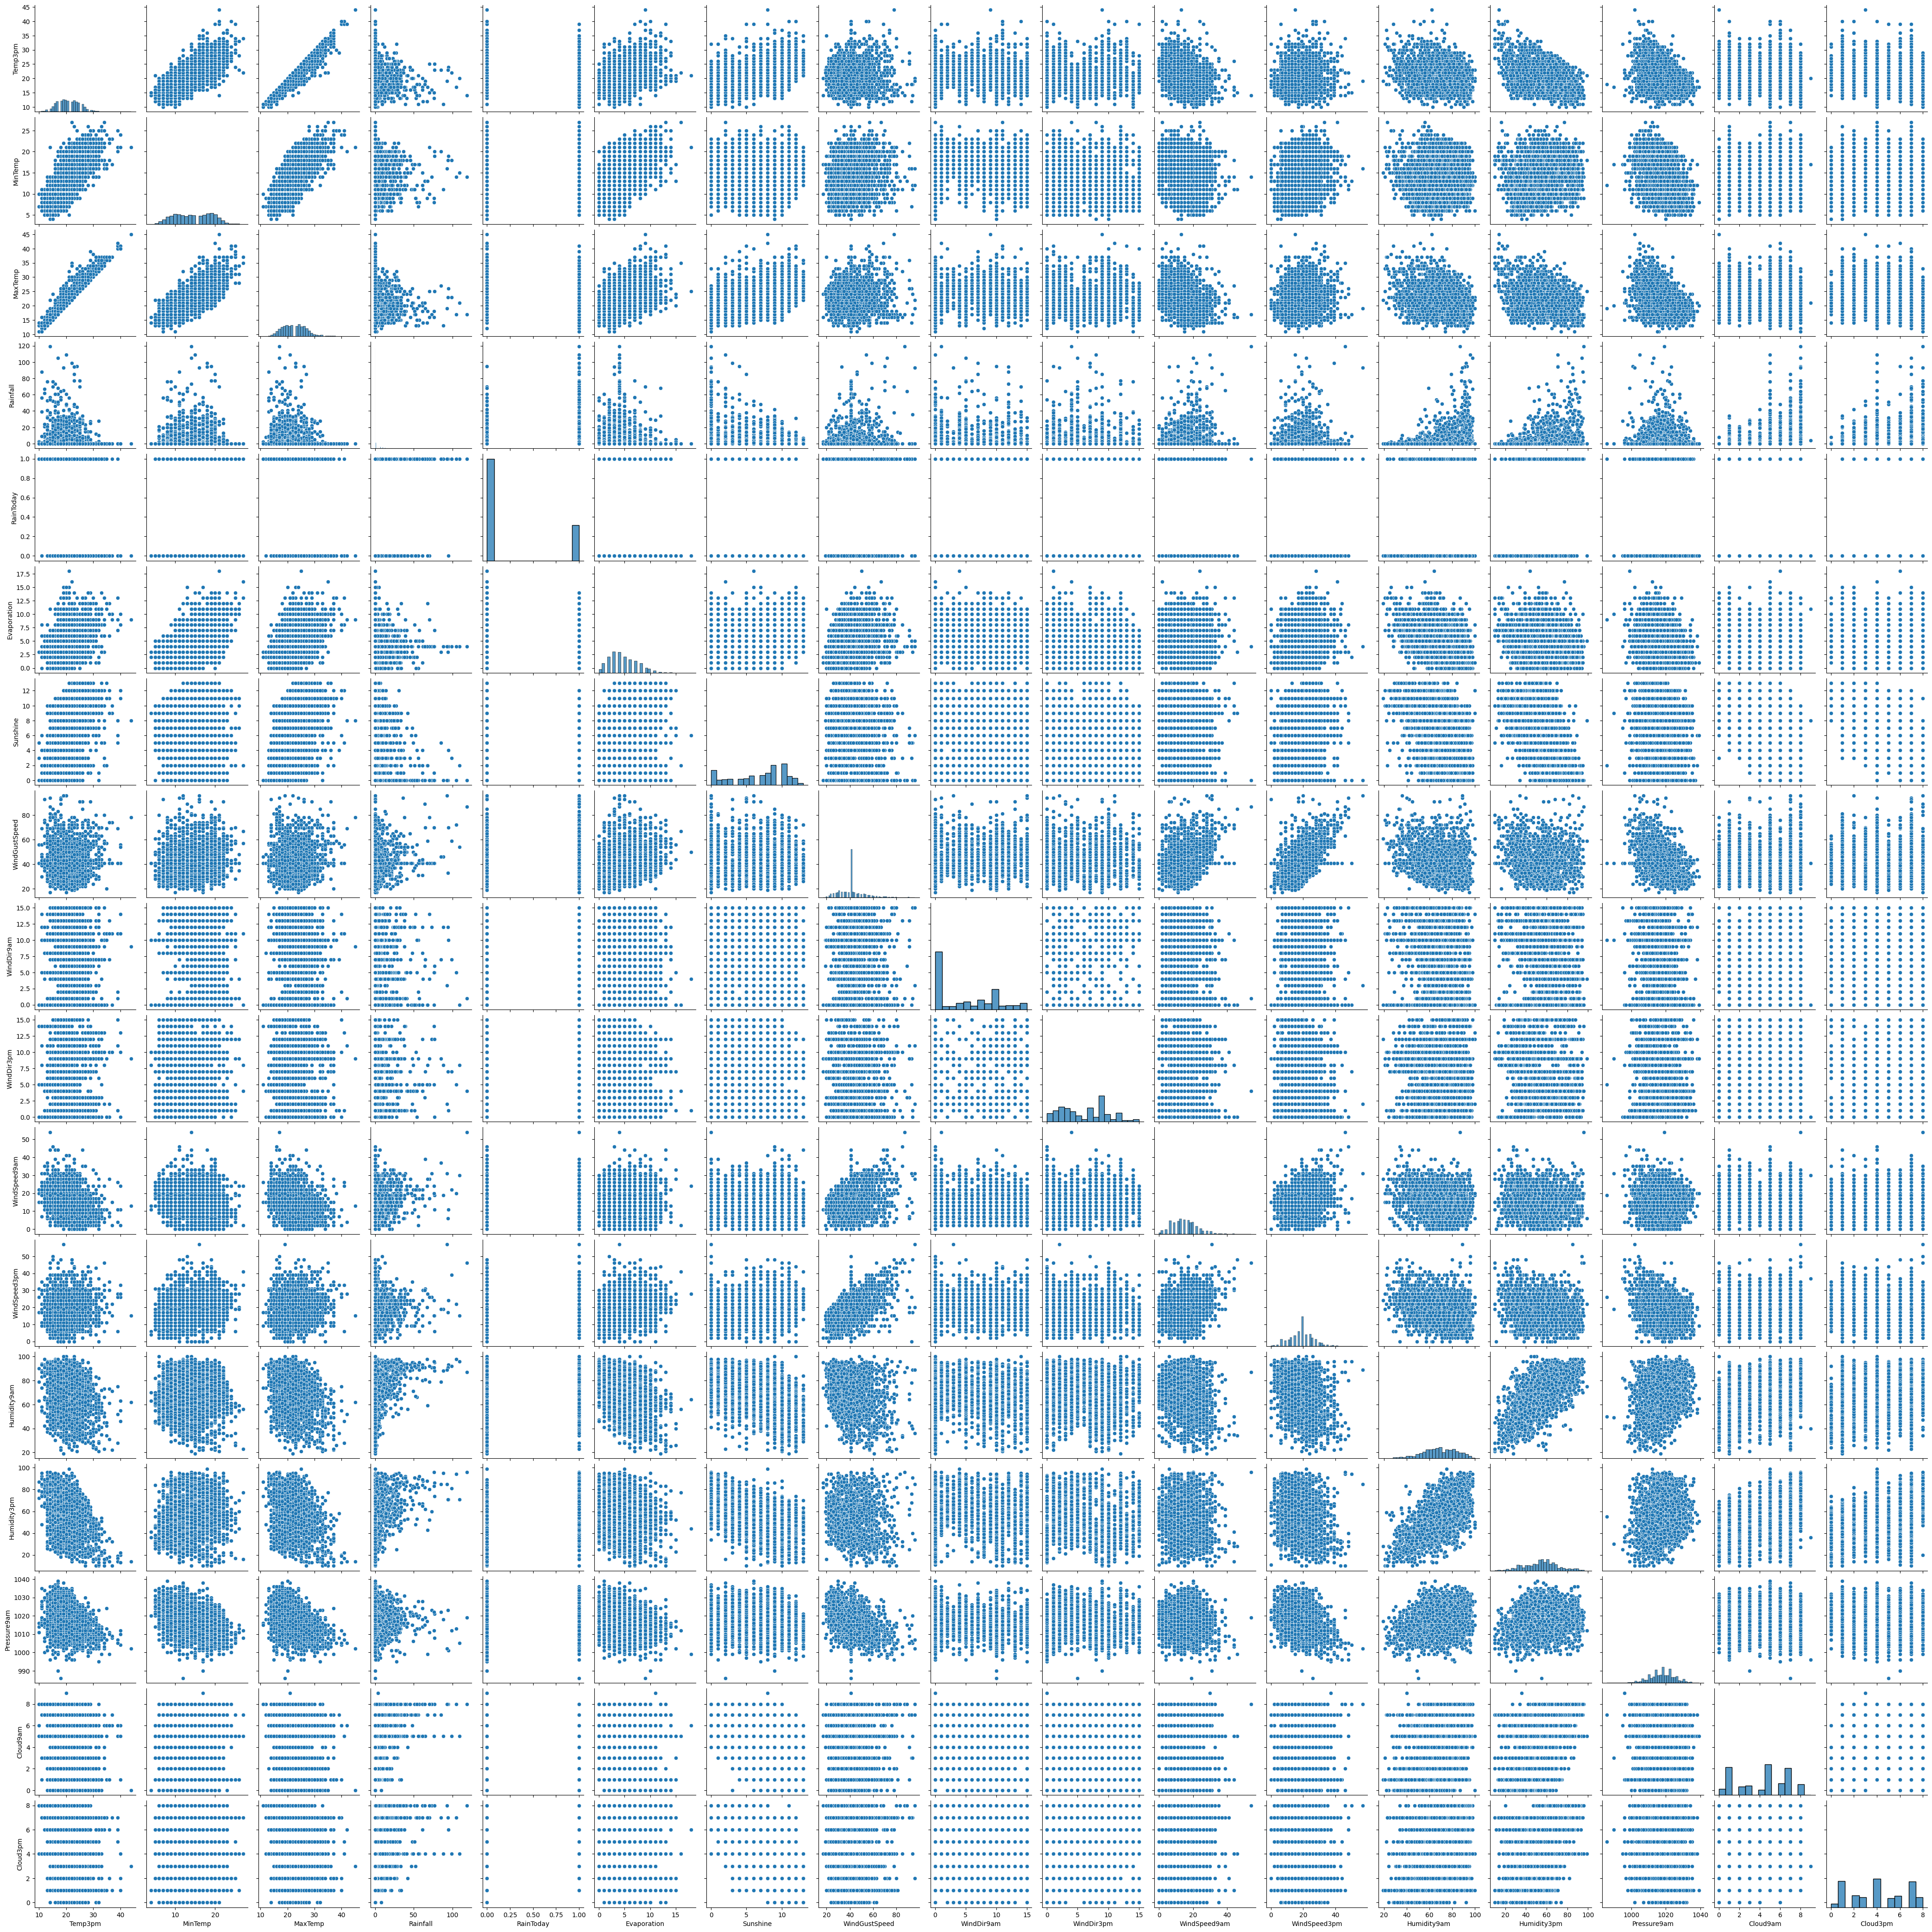

In [ ]:
sns.pairplot(df)

<Axes: xlabel='RainToday', ylabel='count'>

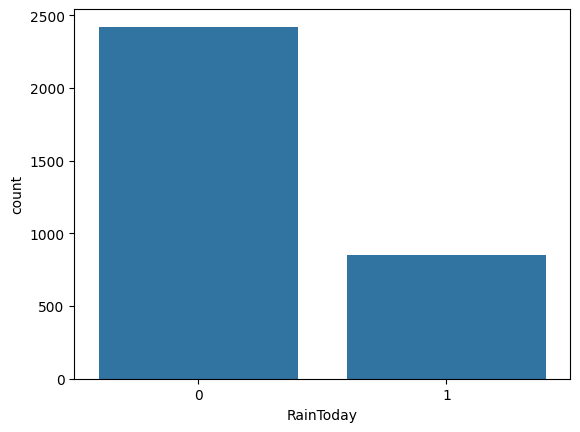

In [ ]:
sns.countplot(x='RainToday',data=df)

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


In [ ]:
%%writefile app.py

Writing app.py


In [ ]:
! wget -q -o - ipv4.icanhazip.com

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



npx: installed 22 in 4.639s
your url is: https://odd-grapes-return.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.255.117:8501

